<a href="https://colab.research.google.com/github/juanmed/gtviolence/blob/master/Graficar_data_2001_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar datos de violencia por municipios de 2001 a 2017

Este script demuestra cómo cargar y gráficar los datos de violencia homicida por municipalidades obtenidos desde la página de dialogos.org.gt del evento HACKCR3A, especificamente del documento [Respuesta Solicitud  1893 lesionados por munis mensual y sexo de 2001 a 2017.pdf](https://drive.google.com/drive/folders/1XbOk159rR7zUri7eE1NsJBonMLAkxs8i). 

Este documento está en formato PDF, por lo que primero se convirtió a excel y luego, se reformateó y almacenó de nuevo la información en otro archivo excel cuyo formato es fácil de leer y manipular utilizando el paquete de datos Pandas para python.



### Lo primero es clonar el repositorio que contiene los datos e instalar todas las dependencias


In [8]:
%%shell

#git clone https://github.com/juanmed/gtviolence
cd gtviolence/
python -m pip install -r requirements.txt
cd ..

###  Importar los paquetes necesarios

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import geopandas as gpd
import mplleaflet
import unidecode
import pandas_bokeh
import datetime as dt

Loading BokehJS ...

### Crear el dataframe y mostrar algunos datos


In [13]:
data_dir = 'gtviolence/data/Normalizado.xlsx'

df = pd.read_excel(data_dir, header = [0,1], index_col = 0, parse_dates = True)
print(df.head())
print(df.tail())

departamento ALTA VERAPAZ         ...               months                 year
municipio         CAHABON CHAHAL  ... Unnamed: 341_level_1 Unnamed: 342_level_1
fecha                             ...                                          
2001-01-01              0      0  ...                  jan                 2001
2001-02-01              1      0  ...                  feb                 2001
2001-03-01              0      0  ...                  mar                 2001
2001-04-01              0      0  ...                  apr                 2001
2001-05-01              0      0  ...                  may                 2001

[5 rows x 342 columns]
departamento ALTA VERAPAZ         ...               months                 year
municipio         CAHABON CHAHAL  ... Unnamed: 341_level_1 Unnamed: 342_level_1
fecha                             ...                                          
2018-08-01              0      0  ...                  aug                 2018
2018-09-01      

### Crear gráficas de algunos departamentos

Depto: ALTA VERAPAZ hay 17 municipios
Depto: BAJA VERAPAZ hay 8 municipios
Depto: CHIMALTENANGO hay 16 municipios
Depto: CHIQUIMULA hay 11 municipios
Depto: EL PROGRESO hay 8 municipios
Depto: ESCUINTLA hay 14 municipios
Depto: GUATEMALA hay 17 municipios
Depto: HUEHUETENANGO hay 33 municipios
Depto: IZABAL hay 5 municipios
Depto: JALAPA hay 7 municipios
Depto: JUTIAPA hay 17 municipios
Depto: PETEN hay 14 municipios
Depto: QUETZALTENANGO hay 24 municipios
Depto: QUICHE hay 21 municipios
Depto: RETALHULEU hay 9 municipios
Depto: SACATEPEQUEZ hay 16 municipios
Depto: SAN MARCOS hay 30 municipios
Depto: SANTA ROSA hay 14 municipios
Depto: SOLOLA hay 19 municipios
Depto: SUCHITEPEQUEZ hay 21 municipios
Depto: TOTONICAPAN hay 8 municipios
Depto: ZACAPA hay 11 municipios
Depto: months hay 1 municipios
Depto: year hay 1 municipios


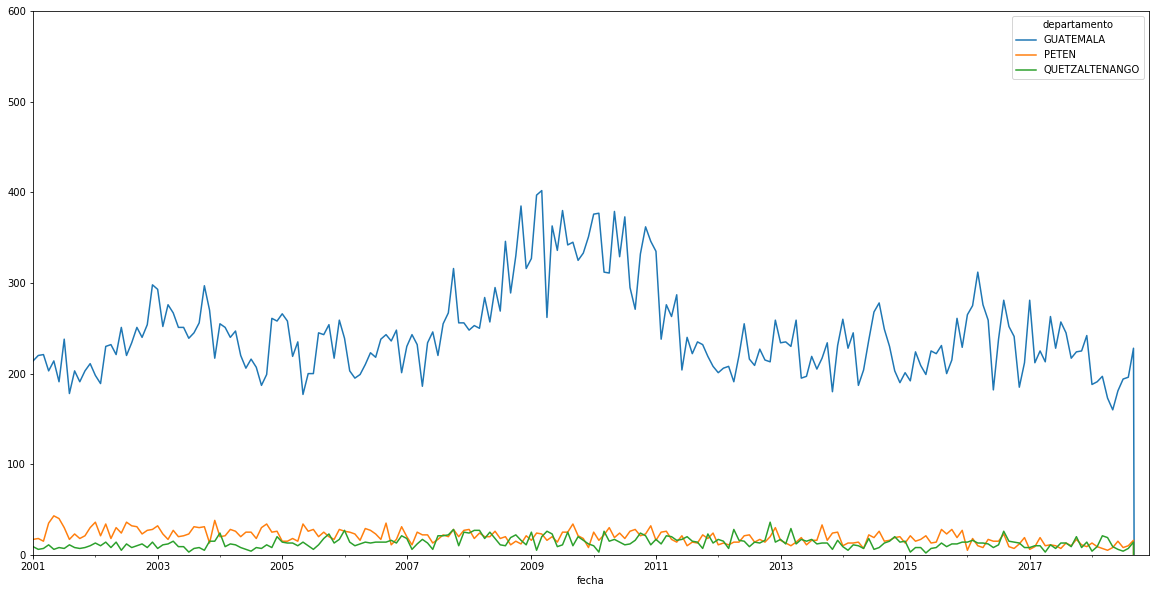

In [154]:
#graficar datos de algunos departamentos
deptos = ['GUATEMALA', 'QUETZALTENANGO', 'PETEN']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for dep in np.unique(df.columns.get_level_values('departamento')):

  # Mostrar numero de municipios por departamento para corroborar información
  a = df.xs(dep, level='departamento', axis=1).columns.get_level_values('municipio')
  print("Depto: "+dep+" hay "+str(len(a))+" municipios")

  try:
    if dep in deptos:
      
      dep_data = df.xs(dep, level='departamento', axis=1, drop_level = False)
      dep_data = dep_data.groupby(level = 0, axis = 1).sum().plot(figsize=(20,10), legend = True, sharex = True, sharey=True, ax = ax, ylim =(0,600))
      
  except:
    print("No existe depto: "+dep)
  

### Obtener datos GIS para mostrar los datos sobre el mapa de Guatemala

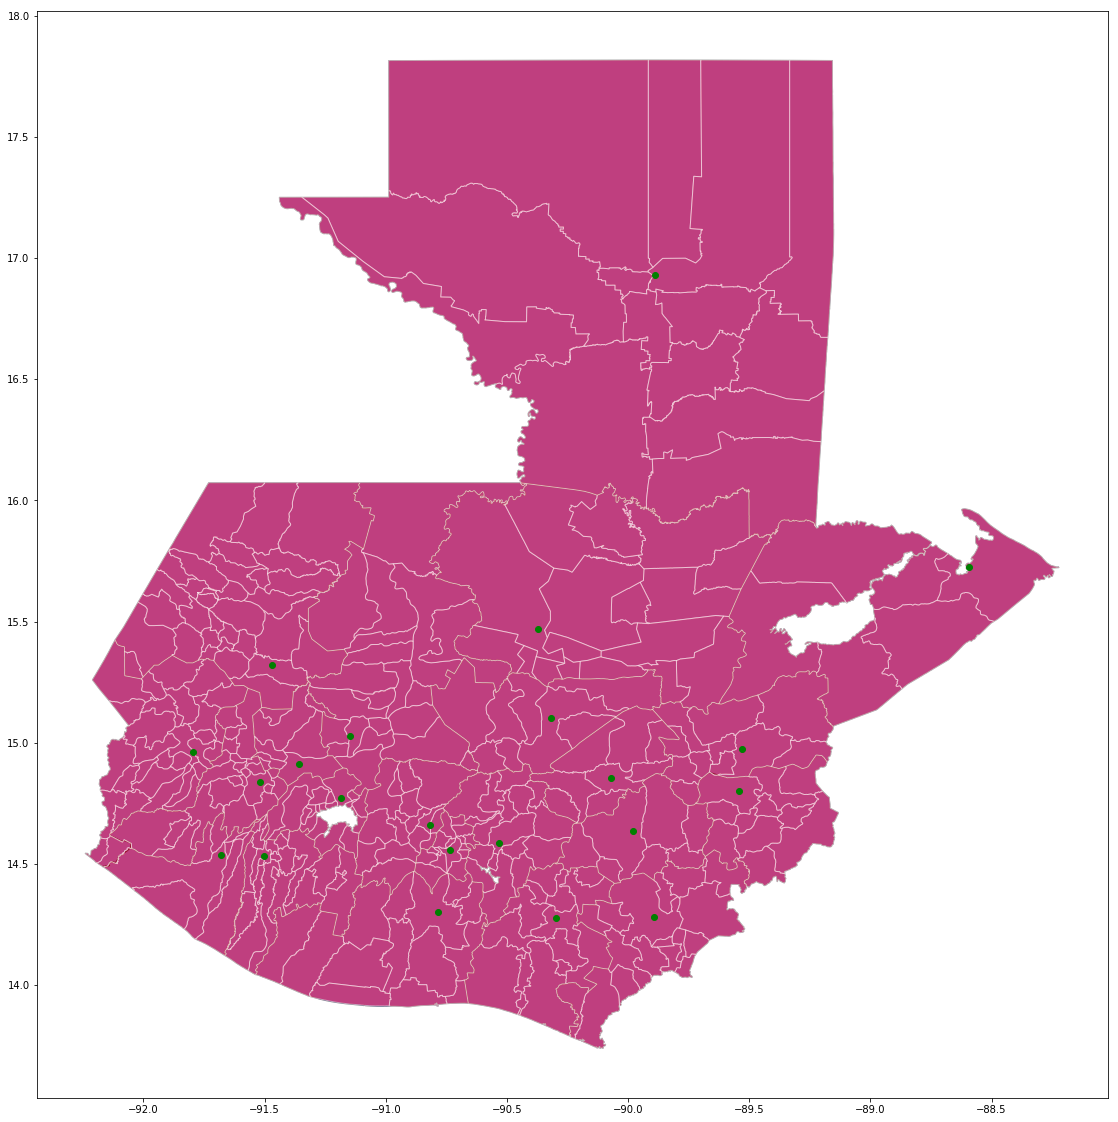

In [135]:
# importar datos GIS de departamentos y municipios y sus cabeceras
deptos = gpd.read_file("gtviolence/data/GIS/mapa_base_limites_departamentales_epsg4326.geojson")
muns = gpd.read_file("gtviolence/data/GIS/mapa_base_limites_municipales_epsg4326.geojson")
dep_cab = gpd.read_file("gtviolence/data/GIS/mapa_base_cabeceras_departamentales_epsg4326.geojson")
mun_cap = gpd.read_file("gtviolence/data/GIS/mapa_base_cabeceras_municipales_epsg4326.geojson")
deptos['departamen'] = deptos['departamen'].apply(lambda x: unidecode.unidecode(x).upper())
muns['departamen'] = muns['departamen'].apply(lambda x: unidecode.unidecode(x).upper())


gt_mapa = plt.figure(figsize=(20,20))
gt_mapa_ax0 = gt_mapa.add_subplot(1,1,1)

# Graficar mapa de Guate con limites municipales y cabeceras, pero aun
# sin los datos de muertes violentas
deptos.plot(ax = gt_mapa_ax0, color = 'b', alpha = 0.5, edgecolor='black')
muns.plot(ax = gt_mapa_ax0, color = 'r', alpha = 0.5, edgecolor='white')
dep_cab.plot(ax = gt_mapa_ax0, color = 'g')

In [97]:
# mostrar número de municipios por departamento para corroborar la información
for dep in np.unique(muns["departamen"]):
	temp = muns[ muns["departamen"] == dep]
	print("En "+dep+" hay "+str(len(temp["municipio"]))+" municipios")
	for mun in temp["municipio"]:
		#print(mun)
		continue

print(deptos.columns)

En ALTA VERAPAZ hay 17 municipios
En BAJA VERAPAZ hay 8 municipios
En CHIMALTENANGO hay 16 municipios
En CHIQUIMULA hay 11 municipios
En EL PROGRESO hay 8 municipios
En ESCUINTLA hay 14 municipios
En GUATEMALA hay 17 municipios
En HUEHUETENANGO hay 33 municipios
En IZABAL hay 5 municipios
En JALAPA hay 7 municipios
En JUTIAPA hay 17 municipios
En PETEN hay 14 municipios
En QUETZALTENANGO hay 24 municipios
En QUICHE hay 21 municipios
En RETALHULEU hay 9 municipios
En SACATEPEQUEZ hay 16 municipios
En SAN MARCOS hay 30 municipios
En SANTA ROSA hay 14 municipios
En SOLOLA hay 19 municipios
En SUCHITEPEQUEZ hay 21 municipios
En TOTONICAPAN hay 8 municipios
En ZACAPA hay 11 municipios
Index(['objectid', 'departamen', 'cod_dep', 'shape_leng', 'shape_area',
       'geometry'],
      dtype='object')


### Graficar datos de muertes violentas para un periodo sobre el mapa de Guatemala

In [0]:
# Obtener sumatoria de muertes violentas para un rango de anos especifico
start = df.index.searchsorted(dt.datetime(2001, 1, 1))
end = df.index.searchsorted(dt.datetime(2017, 1, 1))

# obtener rango de datos, sumar todos a lo largo de todos los municipios
# y todos los meses
year_data = df.iloc[start:end].groupby(level = 0, axis = 1).sum().sum()
year_data = year_data.drop(labels=['year', 'months'], axis = 0)

deptos = deptos.set_index('departamen', drop = False)

a1, a2 = deptos.align(year_data, axis =0)
a1['muertes'] = a2.apply(lambda x: int(x))
#print(a1.columns)


In [140]:
pandas_bokeh.output_notebook()

a1.plot_bokeh(
    figsize=(900, 600),
    #simplify_shapes=5000,
    #dropdown=["POPESTIMATE2010", "POPESTIMATE2017"],
    category = 'muertes',
    colormap="Viridis",
    colormap_uselog = True,
    show_colorbar = True,
    hovertool_columns=['muertes', 'departamen'],
    #tile_provider_url=r"http://c.tile.stamen.com/watercolor/{Z}/{X}/{Y}.jpg"
    )

#pandas_bokeh.show(draw)


Loading BokehJS ...

Figure(id='3793', ...)

### Graficar los datos de muertes violentas por año, utilizando un barra para cambiar el año desplegado


In [150]:
start_year = 2001
end_year = 2018

years = np.arange(start_year,end_year,1)

# Obtener sumatoria de muertes por ano
for year in years:
  
  start = df.index.searchsorted(dt.datetime(year, 1, 1))
  end = df.index.searchsorted(dt.datetime(year+1, 1, 1))

  # obtener rango de datos, sumar todos a lo largo de todos los municipios
  # y todos los meses
  year_data = df.iloc[start:end].groupby(level = 0, axis = 1).sum().sum()
  year_data = year_data.drop(labels=['year', 'months'], axis = 0)

  #deptos = deptos.set_index('departamen', drop = False)

  a1, a2 = deptos.align(year_data, axis =0)
  deptos[str(year)] = a2.apply(lambda x: int(x))

Index(['objectid', 'departamen', 'cod_dep', 'shape_leng', 'shape_area',
       'geometry', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')


In [153]:
pandas_bokeh.output_notebook()

slider_columns = ['{}'.format(x) for x in range(start_year, end_year)]
slider_range = range(start_year, end_year)

deptos.plot_bokeh(
    #figsize=(900, 600),
    #simplify_shapes=5000,
    slider=slider_columns,
    slider_range=slider_range,
    slider_name="Year", 
    colormap="Viridis",
    hovertool_columns=["departamen"] + slider_columns,
    colormap_uselog = True,
    title="Muertes Violentas por Año")

Loading BokehJS ...

Column(id='5147', ...)